In [1]:
#code using a covering gride to convert 3d array into 2d array
import numpy as np
import yt
import time
from yt.funcs import mylog
import matplotlib.pyplot as plt
mylog.setLevel(40) #prevents warning

In [30]:
#setup for 0116 part1
start = time.time()
print('starting')

ds = yt.load("OUT_hdf5_plt_cnt_0116")
ds.print_stats()

level2 = ds.covering_grid(2,left_edge=ds.domain_left_edge,dims=ds.domain_dimensions*2**2)
level2.shape

end = time.time()
print("time:",(end-start)/60)

starting
level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	  4096	      16777216	           256
  1	 17264	      70713344	           414
  2	  8192	      33554432	           323
----------------------------------------------
   	 29552	     121044992


t = 9.13589447e+13 = 9.13589447e+13 s = 2.89499026e+06 years

Smallest Cell:
	Width: 1.953e-09 Mpc
	Width: 1.953e-03 pc
	Width: 4.029e+02 AU
	Width: 6.027e+15 cm
time: 0.20280684232711793


In [50]:
#code for 016 part 2
start = time.time()
print('starting')

#den = level2['density']
den_flat_v= den.flatten()
den_mean_v = np.mean(den_flat_v)
log_den_v = np.log(den_flat_v/den_mean_v)

end = time.time()
print("time:",(end-start)/60)

starting
time: 0.9834786057472229


starting
0
1048576
1
1048576
2
1048576


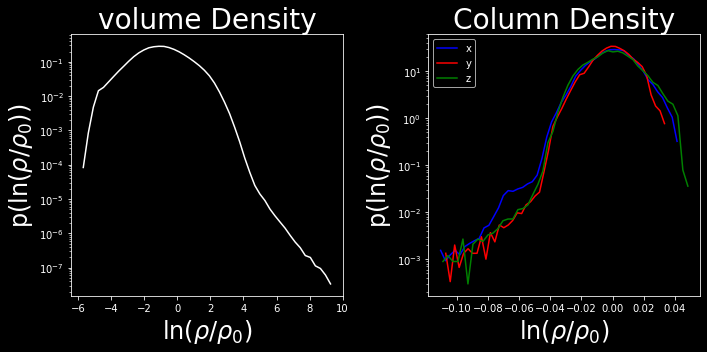

time: 0.6713107347488403


In [52]:
#graphing 0116 part 3
start = time.time()
print('starting')

counts_v, binS_v = np.histogram(log_den_v,bins=50, density = True)
bin_list = []
for i in range(len(binS_v)-1):
    bin_i=(binS_v[i]+binS_v[i+1])/2
    bin_list.append(bin_i)

fig, ax = plt.subplots(nrows=1,ncols=2, sharex=False,figsize=(10,5))
ax[0].plot(bin_list, counts_v, color = 'w')
ax[0].set_yscale('log')
ax[0].set_xlabel(r'ln($\rho/\rho_0$)', size=24)
ax[0].set_ylabel(r'p(ln($\rho/\rho_0$))', size=24)
ax[0].set_title('volume Density', size = 28)


color_list = ('b', 'r', 'g')

for a in (range(3)):
    print(a)
    den_d = np.sum(den, axis = a)
    den_flat_d = np.log(den_d.flatten())
    print(len(den_flat_d))
    den_mean_d = np.mean(den_flat_d)
    log_den_d = np.log(den_flat_d/den_mean_d)
    counts_d, binS_d = np.histogram(log_den_d,bins=50, density= True)
    
    bin_list = []
    for i in range(len(binS_d)-1):
        bin_i=(binS_d[i]+binS_d[i+1])/2
        bin_list.append(bin_i)
    ax[1].set_xlabel(r'ln($\rho/\rho_0$)', size=24)
    ax[1].set_ylabel(r'p(ln($\rho/\rho_0$))', size=24)
    ax[1].set_title('Column Density', size = 28)
    ax[1].plot(bin_list, counts_d, color = color_list[a])
    ax[1].set_yscale('log')


ax[1].legend([ 'x', 'y', 'z'])

plt.tight_layout()
plt.savefig('column_den test', bbox_inches='tight')
plt.show()

end = time.time()
print("time:",(end-start)/60)

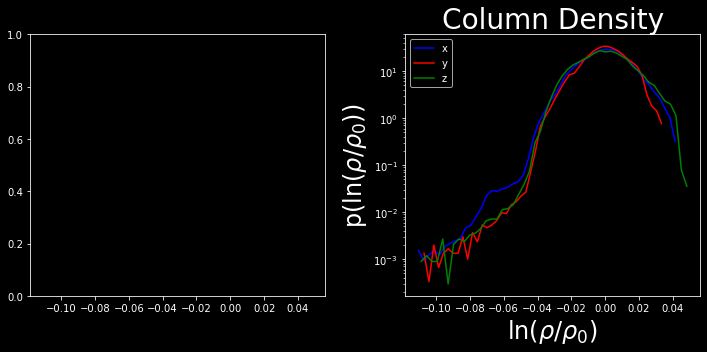

In [47]:
#just column part

color_list = ('b', 'r', 'g')
den = level2['density']
fig, ax = plt.subplots(nrows=1,ncols=2, sharex=True,figsize=(10,5))

for a in range(3):
    den_0 = np.sum(den, axis = a)
    den_flat = np.log(den_0.flatten())
    den_mean = np.mean(den_flat)
    log_den = np.log(den_flat/den_mean)
    counts, binS = np.histogram(log_den,bins=50, density= True)
    
    bin_list = []
    for i in range(len(binS)-1):
        bin_i=(binS[i]+binS[i+1])/2
        bin_list.append(bin_i)
    ax[1].set_xlabel(r'ln($\rho/\rho_0$)', size=24)
    ax[1].set_ylabel(r'p(ln($\rho/\rho_0$))', size=24)
    ax[1].set_title('Column Density', size = 28)
    ax[1].plot(bin_list, counts, color = color_list[a])
    ax[1].set_yscale('log')


ax[1].legend([ 'x', 'y', 'z'])

plt.tight_layout()
plt.style.use('dark_background')
plt.savefig('column_den test', bbox_inches='tight')
plt.show()

In [10]:
plt.imshow

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=<deprecated parameter>, filternorm=1, filterrad=4.0, imlim=<deprecated parameter>, resample=None, url=None, *, data=None, **kwargs)>

In [37]:
den_2 = np.sum(den, axis = 2)
den_1 = np.sum(den, axis = 1)
print(den_1)
print('break')
print(den_2)

[[3.07961300e-18 3.07961300e-18 3.21073754e-18 ... 3.15823750e-18
  3.05386121e-18 3.05386121e-18]
 [3.07961300e-18 3.07961300e-18 3.21073754e-18 ... 3.15823750e-18
  3.05386121e-18 3.05386121e-18]
 [3.12504498e-18 3.12504498e-18 3.21211425e-18 ... 3.16663005e-18
  3.11134713e-18 3.11134713e-18]
 ...
 [3.07108461e-18 3.07108461e-18 3.19381790e-18 ... 3.06037421e-18
  3.02818571e-18 3.02818571e-18]
 [3.05339283e-18 3.05339283e-18 3.17412708e-18 ... 3.07653233e-18
  3.00880982e-18 3.00880982e-18]
 [3.05339283e-18 3.05339283e-18 3.17412708e-18 ... 3.07653233e-18
  3.00880982e-18 3.00880982e-18]] g/cm**3
break
[[5.27153442e-19 5.27153442e-19 3.94909849e-19 ... 5.31597085e-19
  5.90422618e-19 5.90422618e-19]
 [5.27153442e-19 5.27153442e-19 3.94909849e-19 ... 5.31597085e-19
  5.90422618e-19 5.90422618e-19]
 [5.86544161e-19 5.86544161e-19 5.12282196e-19 ... 7.67256997e-19
  6.82190741e-19 6.82190741e-19]
 ...
 [5.50788190e-19 5.50788190e-19 4.20026697e-19 ... 6.15124268e-19
  6.18539591e-19 6

In [8]:
a

2